In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nba-games/players.csv
/kaggle/input/nba-games/teams.csv
/kaggle/input/nba-games/ranking.csv
/kaggle/input/nba-games/games_details.csv
/kaggle/input/nba-games/games.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
games_df = pd.read_csv('/kaggle/input/nba-games/games.csv')
game_deets_df = pd.read_csv('/kaggle/input/nba-games/games_details.csv', low_memory=False)
players_df = pd.read_csv('/kaggle/input/nba-games/players.csv')
ranking_df = pd.read_csv('/kaggle/input/nba-games/ranking.csv')
teams_df = pd.read_csv('/kaggle/input/nba-games/teams.csv')
games_df['GAME_DATE_EST']= pd.to_datetime(games_df['GAME_DATE_EST'])
pd.set_option('display.max_columns',21)

def get_mean(group, column):
    return group[column].mean()
def get_2mean(df,first,second):
    return (df[first]/df[second]).mean()
def get_2median(df,first,second):
    return (df[first]/df[second]).median()



In [4]:
print(f'Game details has {game_deets_df.shape[0]} rows and {game_deets_df.shape[1]} columns')
print(f'Team games has {games_df.shape[0]} rows and {games_df.shape[1]} columns')
print(f'Player informations has {players_df.shape[0]} rows and {players_df.shape[1]} columns')
print(f'Team ranking has {ranking_df.shape[0]} rows and {ranking_df.shape[1]} columns')
print(f'Team information has {teams_df.shape[0]} rows and {teams_df.shape[1]} columns')

Game details has 668628 rows and 29 columns
Team games has 26651 rows and 21 columns
Player informations has 7228 rows and 4 columns
Team ranking has 210342 rows and 13 columns
Team information has 30 rows and 14 columns


# Group Data

In [5]:
wl_group = games_df.groupby(['HOME_TEAM_WINS'])

win_filt = wl_group.get_group(1)
lose_filt = wl_group.get_group(0)

reb_grp = games_df.groupby(['REB_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)
losereb_grp = games_df.groupby(['REB_away','HOME_TEAM_WINS'])
losereb_table = losereb_grp.size().unstack(fill_value=0)
ast_grp = games_df.groupby(['AST_home','HOME_TEAM_WINS'])
mean_w_reb = get_mean(win_filt,'REB_home')
ast_table= ast_grp.size().unstack(fill_value=0)
lose_ast_grp = games_df.groupby(['AST_away','HOME_TEAM_WINS'])
lose_ast_table = lose_ast_grp.size().unstack(fill_value=0)
fgpct_grp = games_df.groupby(['FG_PCT_home','HOME_TEAM_WINS'])
fgpct_table = fgpct_grp.size().unstack(fill_value=0)
fgpct_grp_lose = games_df.groupby(['FG_PCT_away','HOME_TEAM_WINS'])
fgpct_away_table = fgpct_grp_lose.size().unstack(fill_value=0)
fg3pct_grp= games_df.groupby(['FG3_PCT_home','HOME_TEAM_WINS'])
fg3pct_table = fg3pct_grp.size().unstack(fill_value=0)
fg3pct_grp_lose = games_df.groupby(['FG3_PCT_away','HOME_TEAM_WINS'])
fg3pct_away_table = fg3pct_grp_lose.size().unstack(fill_value=0)
ast_reb_grp = games_df.groupby(['AST_home','REB_home','HOME_TEAM_WINS'])
ast_reb_table = ast_reb_grp.size().unstack(fill_value=0)
teams_grp = games_df.groupby(['HOME_TEAM_ID','HOME_TEAM_WINS'])
most_win_table = teams_grp['HOME_TEAM_WINS'].size().unstack(fill_value=0)
teams_df.sort_values(by='TEAM_ID',ascending = True,inplace = True)
most_win_table.sort_values(by='HOME_TEAM_ID',ascending = True,inplace = True)
most_win_table['NAME'] = teams_df['NICKNAME'].values
most_win_table['ARENA_CAP'] = teams_df['ARENACAPACITY'].values
most_win_table.sort_values(by='ARENA_CAP',ascending = False,inplace = True)

# Data Analysis
**How often does the home team win?**

In [6]:
pct_home_win = games_df['HOME_TEAM_WINS'].value_counts()/len(games_df) * 100
print(f'Teams are likely to win {pct_home_win[1]:.2f}% during home games, and lose {pct_home_win[0]:.2f}% during home games')

Teams are likely to win 58.70% during home games, and lose 41.30% during home games


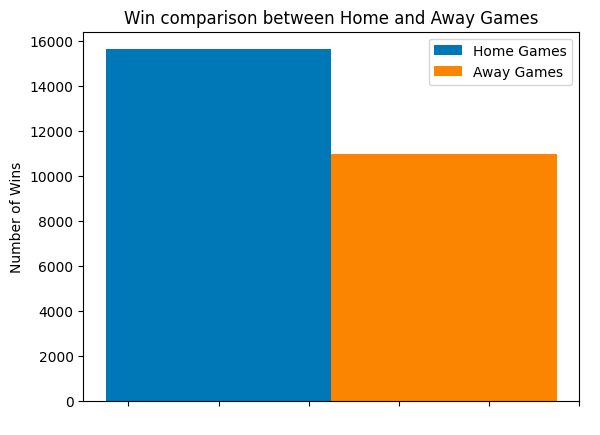

In [7]:
x = win_filt['HOME_TEAM_WINS'].value_counts()
y = lose_filt['HOME_TEAM_WINS'].value_counts()

ti = [0.5]
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Games')
plt.bar(hor + 0.75,y,width = 0.25,color = '#fb8500',label = 'Away Games')

plt.ylabel('Number of Wins')
plt.xticks(color = 'w')
plt.title('Win comparison between Home and Away Games')
plt.legend()

# Data Analysis
**Visualizing assists and rebounds**

In [8]:
ast_grp = games_df.groupby(['AST_home','HOME_TEAM_WINS'])

mean_w_ast = get_mean(win_filt,'AST_home')
mean_l_ast = get_mean(lose_filt,'AST_home')
ptdif_w_ast = get_mean(win_filt,'PTS_home') - get_mean(win_filt,'PTS_away')

mean_w_reb = get_mean(win_filt,'REB_home')
mean_l_reb = get_mean(lose_filt,'REB_home')
ptdif_w_reb = win_filt['REB_home'] - win_filt['REB_away']
print(f'The mean amount of assists made by teams who won home games is {mean_w_ast:.0f}, and the mean amount of assists made by teams who lost home games is {mean_l_ast:.0f}')
print(f'The mean amount of rebounds made by teams who won home games is {mean_w_reb:.0f}, and the mean amount of rebounds made by teams who lost home games is {mean_l_reb:.0f}')

The mean amount of assists made by teams who won home games is 24, and the mean amount of assists made by teams who lost home games is 21
The mean amount of rebounds made by teams who won home games is 45, and the mean amount of rebounds made by teams who lost home games is 41


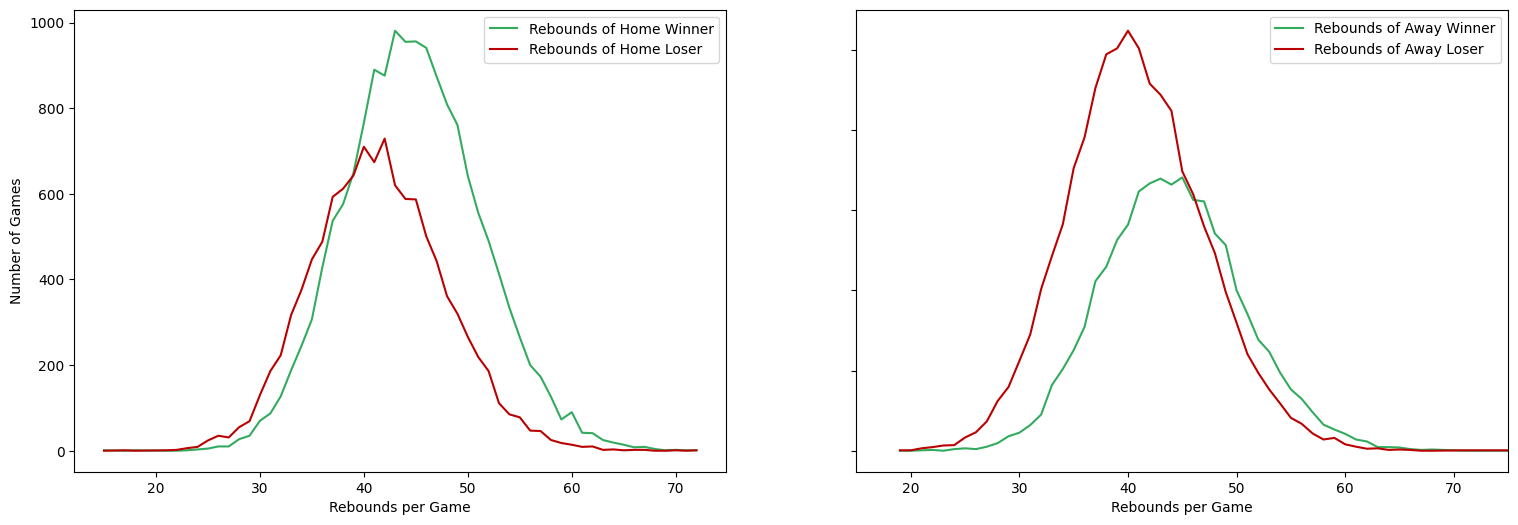

In [9]:
reb_grp = games_df.groupby(['REB_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)

plt.subplot(1,2,1)
plt.plot(reb_table[1], color = '#33AB5F',label = 'Rebounds of Home Winner')
plt.plot(reb_table[0], color = '#BA0001',label = 'Rebounds of Home Loser')

plt.ylabel('Number of Games')
plt.xlabel('Rebounds per Game')
plt.legend()

plt.subplot(1,2,2)
losereb_grp = games_df.groupby(['REB_away','HOME_TEAM_WINS'])
losereb_table = losereb_grp.size().unstack(fill_value=0)

plt.plot(losereb_table[0], color = '#33AB5F',label = 'Rebounds of Away Winner')
plt.plot(losereb_table[1], color = '#BA0001',label = 'Rebounds of Away Loser')

plt.yticks(c='w')
plt.xlim([15,75])
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('Rebounds per Game')
plt.legend()

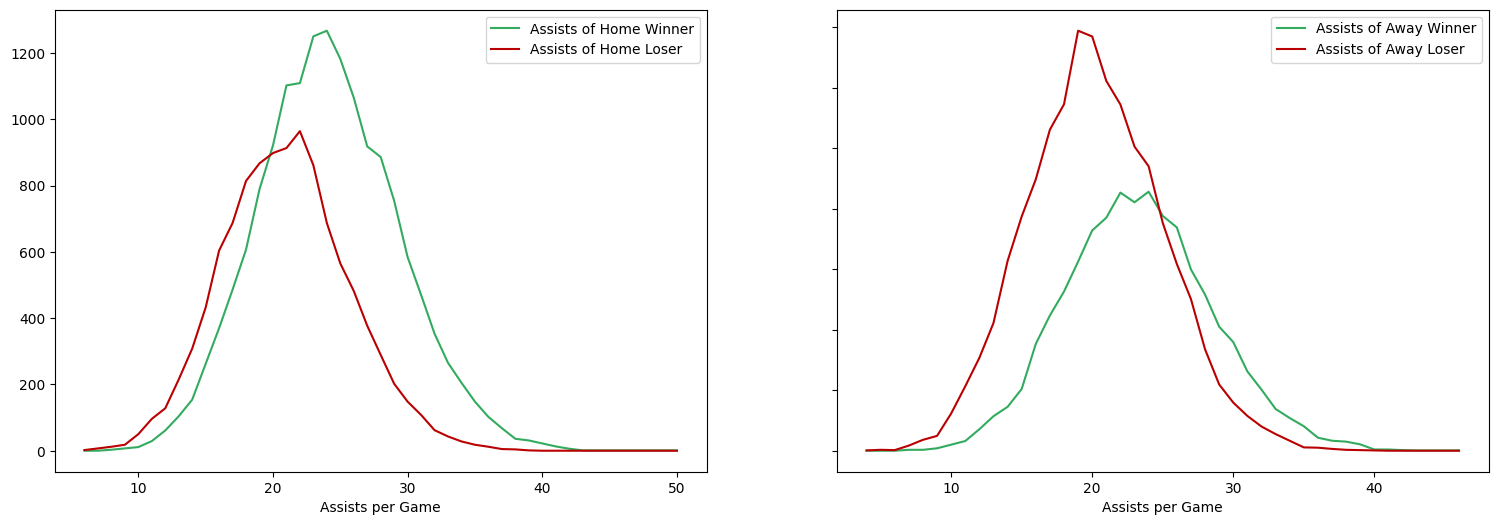

In [10]:
ast_table= ast_grp.size().unstack(fill_value=0)

plt.subplot(1,2,1)

plt.plot(ast_table[1], color = '#33AB5F',label = 'Assists of Home Winner')
plt.plot(ast_table[0], color = '#BA0001',label = 'Assists of Home Loser')

plt.xlabel('Assists per Game')
plt.legend()

plt.subplot(1,2,2)
lose_ast_grp = games_df.groupby(['AST_away','HOME_TEAM_WINS'])
lose_ast_table = lose_ast_grp.size().unstack(fill_value=0)

plt.plot(lose_ast_table[0], color = '#33AB5F',label = 'Assists of Away Winner')
plt.plot(lose_ast_table[1], color = '#BA0001',label = 'Assists of Away Loser')

plt.yticks(c='w')
plt.xlabel('Assists per Game')
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.legend()

# Data Analysis
**Comparing shooting percentages**

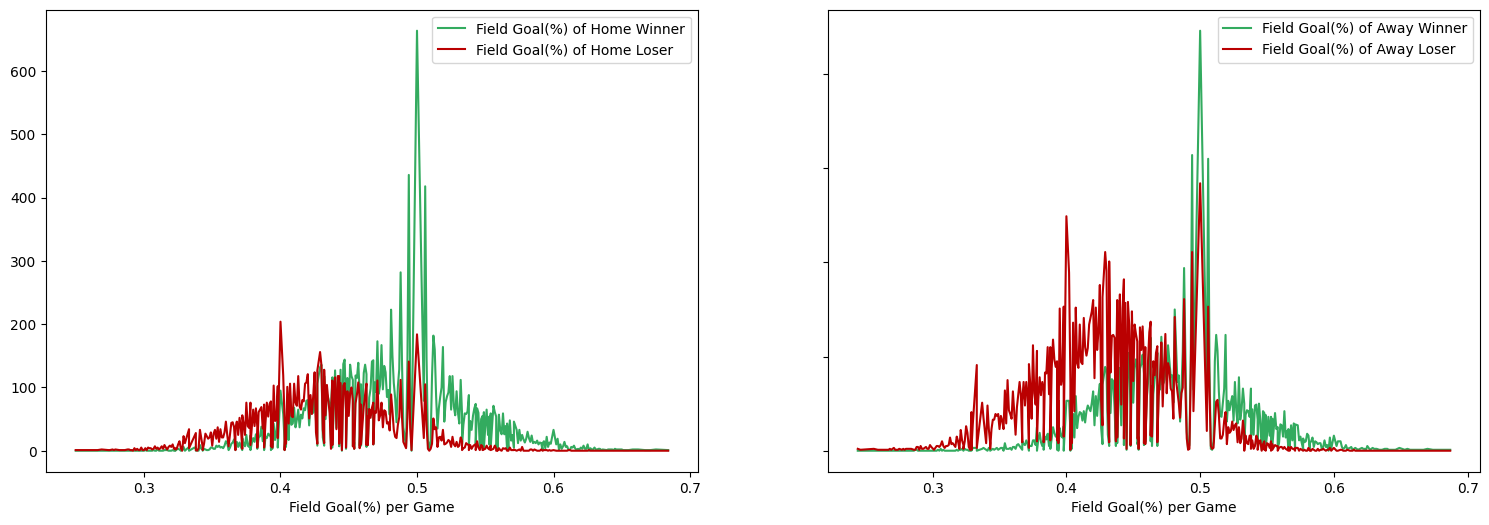

In [11]:
fgpct_grp = games_df.groupby(['FG_PCT_home','HOME_TEAM_WINS'])
fgpct_table = fgpct_grp.size().unstack(fill_value=0)
fgpct_grp_lose = games_df.groupby(['FG_PCT_away','HOME_TEAM_WINS'])
fgpct_away_table = fgpct_grp_lose.size().unstack(fill_value=0)

fg3pct_grp= games_df.groupby(['FG3_PCT_home','HOME_TEAM_WINS'])
fg3pct_table = fg3pct_grp.size().unstack(fill_value=0)
fg3pct_grp_lose = games_df.groupby(['FG3_PCT_away','HOME_TEAM_WINS'])
fg3pct_away_table = fg3pct_grp_lose.size().unstack(fill_value=0)

plt.subplot(1,2,1)

plt.plot(fgpct_table[1], color = '#33AB5F',label = 'Field Goal(%) of Home Winner')
plt.plot(fgpct_table[0], color = '#BA0001',label = 'Field Goal(%) of Home Loser')

plt.xlabel('Field Goal(%) per Game') 
plt.legend(loc = 'upper right')

plt.subplot(1,2,2)

plt.plot(fgpct_away_table[0], color = '#33AB5F',label = 'Field Goal(%) of Away Winner')
plt.plot(fgpct_away_table[1], color = '#BA0001',label = 'Field Goal(%) of Away Loser')

plt.yticks(c='w')
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('Field Goal(%) per Game') 
plt.legend(loc = 'upper right')


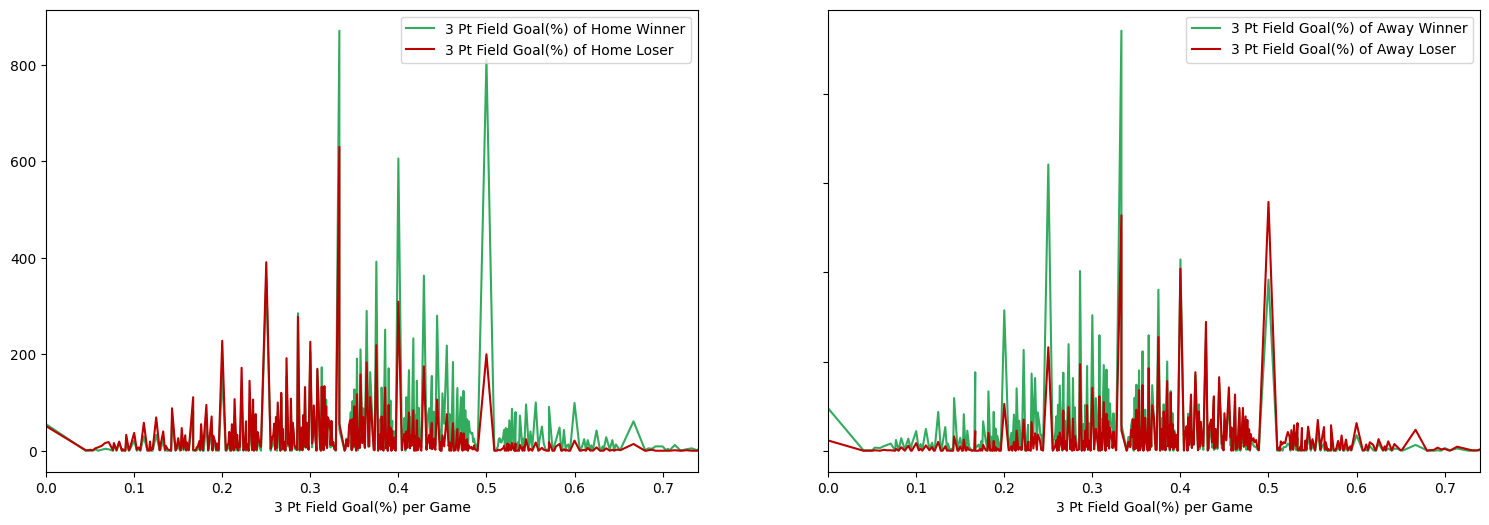

In [12]:
plt.subplot(1,2,1)

plt.plot(fg3pct_table[1], color = '#33AB5F',label = '3 Pt Field Goal(%) of Home Winner')
plt.plot(fg3pct_table[0], color = '#BA0001',label = '3 Pt Field Goal(%) of Home Loser')

plt.xlabel('3 Pt Field Goal(%) per Game') 
plt.legend(loc = 'upper right')
plt.xlim([0,0.74])
plt.subplot(1,2,2)

plt.plot(fg3pct_away_table[1], color = '#33AB5F',label = '3 Pt Field Goal(%) of Away Winner')
plt.plot(fg3pct_away_table[0], color = '#BA0001',label = '3 Pt Field Goal(%) of Away Loser')

plt.yticks(c='w')
plt.xlim([0,0.74])
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('3 Pt Field Goal(%) per Game') 
plt.legend(loc = 'upper right')

# Data Analysis
**Does arena capacity affect the advantage to the home team?**

In [13]:
ast_reb_grp = games_df.groupby(['AST_home','REB_home','HOME_TEAM_WINS'])
ast_reb_table = ast_reb_grp.size().unstack(fill_value=0)

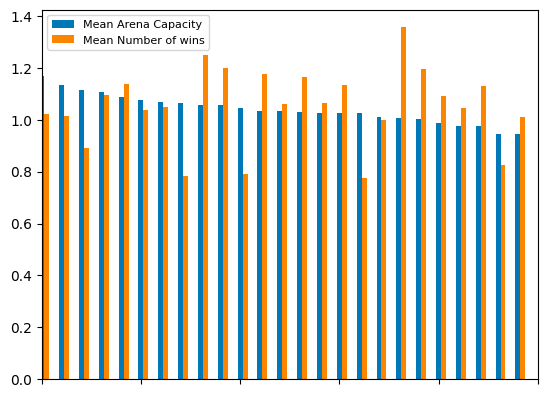

In [14]:
teams_grp = games_df.groupby(['HOME_TEAM_ID','HOME_TEAM_WINS'])
most_win_table = teams_grp['HOME_TEAM_WINS'].size().unstack(fill_value=0)
teams_df.sort_values(by='TEAM_ID',ascending = True,inplace = True)
most_win_table.sort_values(by='HOME_TEAM_ID',ascending = True,inplace = True)
most_win_table['NAME'] = teams_df['NICKNAME'].values
most_win_table['ARENA_CAP'] = teams_df['ARENACAPACITY'].values
most_win_table.sort_values(by='ARENA_CAP',ascending = False,inplace = True)

most_win_table['MEAN_ARENA_CAP']=[x/18553.31 for x in most_win_table['ARENA_CAP']]
most_win_table['MEAN_WINS']=[x/505.17 for x in most_win_table[1]]

ti = [x for x in range(30)]
hor = np.arange(len(ti))

x = [x for x in most_win_table['MEAN_ARENA_CAP']]
y = [x for x in most_win_table['MEAN_WINS']]

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Mean Arena Capacity')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Mean Number of wins')

plt.xlim(0,25)
plt.xticks(color='w')
plt.legend(loc = 'upper left',fontsize = 8)

# Results
1. The home team is approximatley 9% more likely to win, showing the location advantage.

2. Home teams generally shoot better percentages than during away games. 

3. Teams shooting a 50% field goal percentage are more likely to win

4. Surprisingly, there is no correlation between arena capacity and home advantage